In [ ]:
# importing libraries
import cv2, time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

## 1)
### c) The image on the left in the figure below consists of alternating stripes of black/white, each stripe being two pixels wide. The image on the right is the Fourier spectrum of the image on the left, showing the dc term and the frequency terms corresponding to the stripes. (Remember, the spectrum is symmetric so all components, other than the dc term, appear in two symmetric locations.)
(a) Suppose that the stripes of an image of the same size are four pixels wide. Sketch what
the spectrum of the image would look like,
including only the dc term and the two highest-value frequency terms, which correspond
to the two spikes in the spectrum above. \\
(b) Why are the components of the spectrum
limited to the horizontal axis? \\
(c) What would the spectrum look like for an
image of the same size but having stripes that
are one pixel wide? Explain the reason for
your answer. \\
(d) Are the dc terms in (a) and (c) the same, or
are they different? Explain.

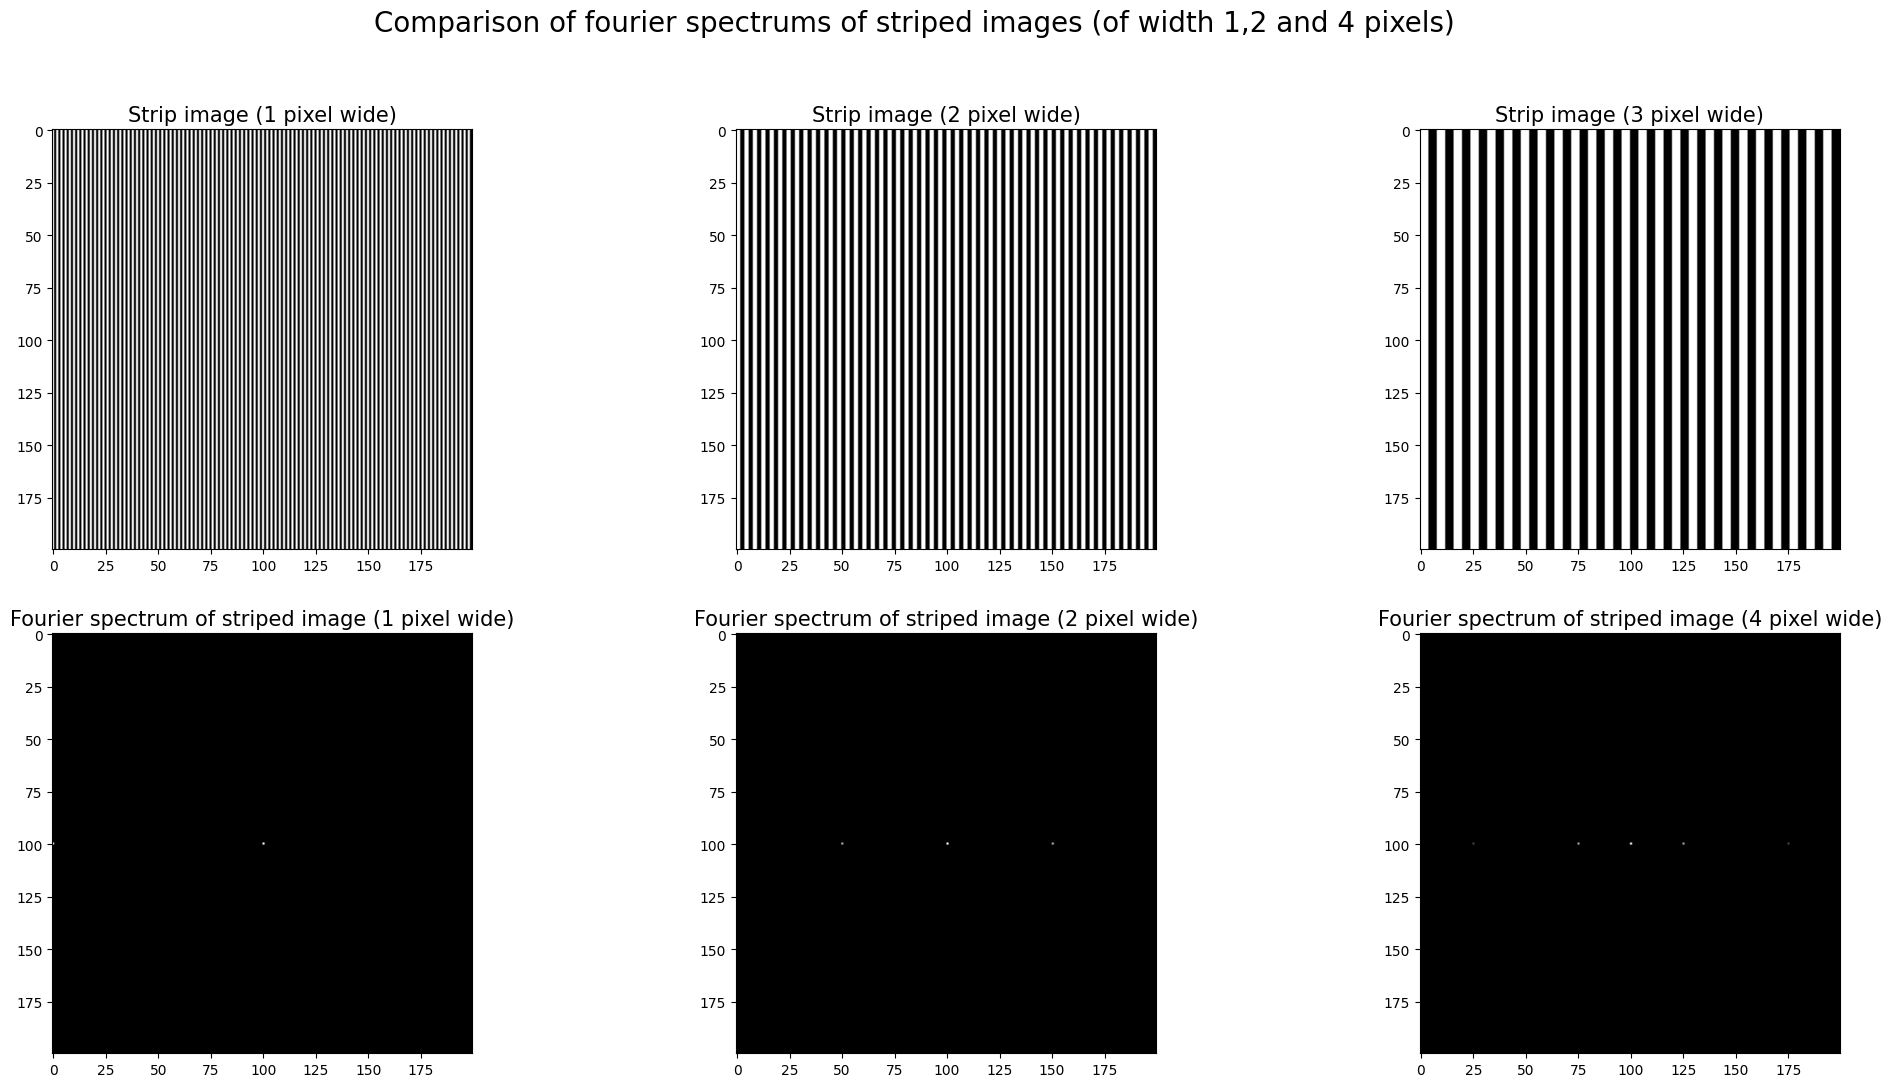

In [ ]:
# Magnitude spectrums for 1, 2 and 4 pixels
def strip_img(width, shape = (200,200)):
  img = np.zeros(shape)
  M,N = shape
  strip = 'w'

  for i in range(0, N, width):
    if strip == 'b':
      img[:,i:(i+width)] = 0
      strip = 'w'
    else:
      img[:,i:(i+width)]=255
      strip = 'b'

  return img

img1 = strip_img(width = 1)
magnitude_spectrum1 = np.abs(np.fft.fftshift(np.fft.fft2(img1)))

img2 = strip_img(width = 2)
magnitude_spectrum2 = np.abs(np.fft.fftshift(np.fft.fft2(img2)))

img3 = strip_img(width = 4)
magnitude_spectrum3 = np.abs(np.fft.fftshift(np.fft.fft2(img3)))

fig, ax = plt.subplots(2,3,figsize=(25,12))
ax[0,0].imshow(img1, cmap = 'gray')
ax[0,0].set_title('Strip image (1 pixel wide)', fontsize = 15)
ax[0,1].imshow(img2, cmap = 'gray')
ax[0,1].set_title('Strip image (2 pixel wide)', fontsize = 15)
ax[0,2].imshow(img3, cmap = 'gray')
ax[0,2].set_title('Strip image (3 pixel wide)', fontsize = 15)
ax[1,0].imshow(magnitude_spectrum1, cmap = 'gray')
ax[1,0].set_title('Fourier spectrum of striped image (1 pixel wide)', fontsize = 15)
ax[1,1].imshow(magnitude_spectrum2, cmap = 'gray')
ax[1,1].set_title('Fourier spectrum of striped image (2 pixel wide)', fontsize = 15)
ax[1,2].imshow(magnitude_spectrum3, cmap = 'gray')
ax[1,2].set_title('Fourier spectrum of striped image (4 pixel wide)', fontsize = 15)
plt.suptitle('Comparison of fourier spectrums of striped images (of width 1,2 and 4 pixels)',fontsize = 20)
plt.show()

  a) Subplots at (1,3) and (2,3) are the required stripped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which corresponds to the two spikes in the spectrum above

  b) The components of the fourier spectrum are limited only to the x-axis since the intensity of the pixel values change while moving along the x-axis from one pixel to another. The change in frequency along the y-axis is zero.

  c) Subplots at (1,1) and (2,1) are the required stripped image (of width 1 pixel) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above


In [ ]:
M,N = img2.shape
magnitude_spectrum1[M//2, N//2], magnitude_spectrum3[M//2, N//2]

(5100000.0, 5100000.0)

  d) Dc terms in both the images (with width 1 pixel and 4 pixels) are the same since the central dc component is nothing but the average brightness of the image which is essentially the same for both cases.


In [ ]:
!rm *.jpg *.png
!gdown --id 1WlW7x7lYVRyStR8KcS61s5t9-pwEbh9e
!unzip Filtering.zip

rm: cannot remove '*.jpg': No such file or directory
rm: cannot remove '*.png': No such file or directory
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WlW7x7lYVRyStR8KcS61s5t9-pwEbh9e
To: /content/Filtering.zip
100% 361k/361k [00:00<00:00, 115MB/s]
Archive:  Filtering.zip
replace Filtering/ZebrawithShadow.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Filtering/ZebrawithShadow.jpg  
  inflating: Filtering/cameraman.jpg  
  inflating: Filtering/ricegrains.jpg  
  inflating: Filtering/moon.jpg      
  inflating: Filtering/tigerbw.jpg   
  inflating: Filtering/penguins.jpg  
  inflating: Filtering/RBCs.bmp      


## 2) Download the image “moon.jpg”. Apply the following spatial filters to the image and compare the results by plotting the images side-by-side:


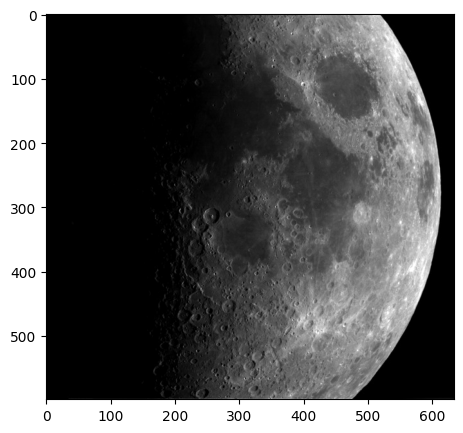

In [ ]:
img = cv2.imread('Filtering/moon.jpg', 0)
plt.imshow(img, cmap = 'gray')

### a) Box filter with kernel size 7 × 7

In [ ]:
# Box filter of size 7x7
box = np.ones((7,7))/(7*7)
img1 = cv2.filter2D(img, -1, box)

### b) Gaussian filter

In [ ]:
k = cv2.getGaussianKernel(5,9)
gauss = k*k.T
img2 = cv2.filter2D(img, -1, gauss)

### c) Laplacian filter - apply the filter and display the Laplacian. Then use appropriate image addition to enhance the edges. Display the result.

In [ ]:
lap = np.array([[0, 1, 0],[1,-4, 1],[0, 1, 0]])
img3_1 = cv2.filter2D(img, -1, lap)
img3_2 = img + img3_1

### d) Sobel filter

In [ ]:
# Sobel in x-direction
sobel_x = cv2.flip(np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]),-1)

# Sobel in y-direction
sobel_y = cv2.flip(np.array([[-1,-2,-1],[0, 0, 0],[1, 2, 1]]),-1)

img4_1 = cv2.filter2D(img, -1, sobel_x)
img4_2 = cv2.filter2D(img, -1, sobel_y)

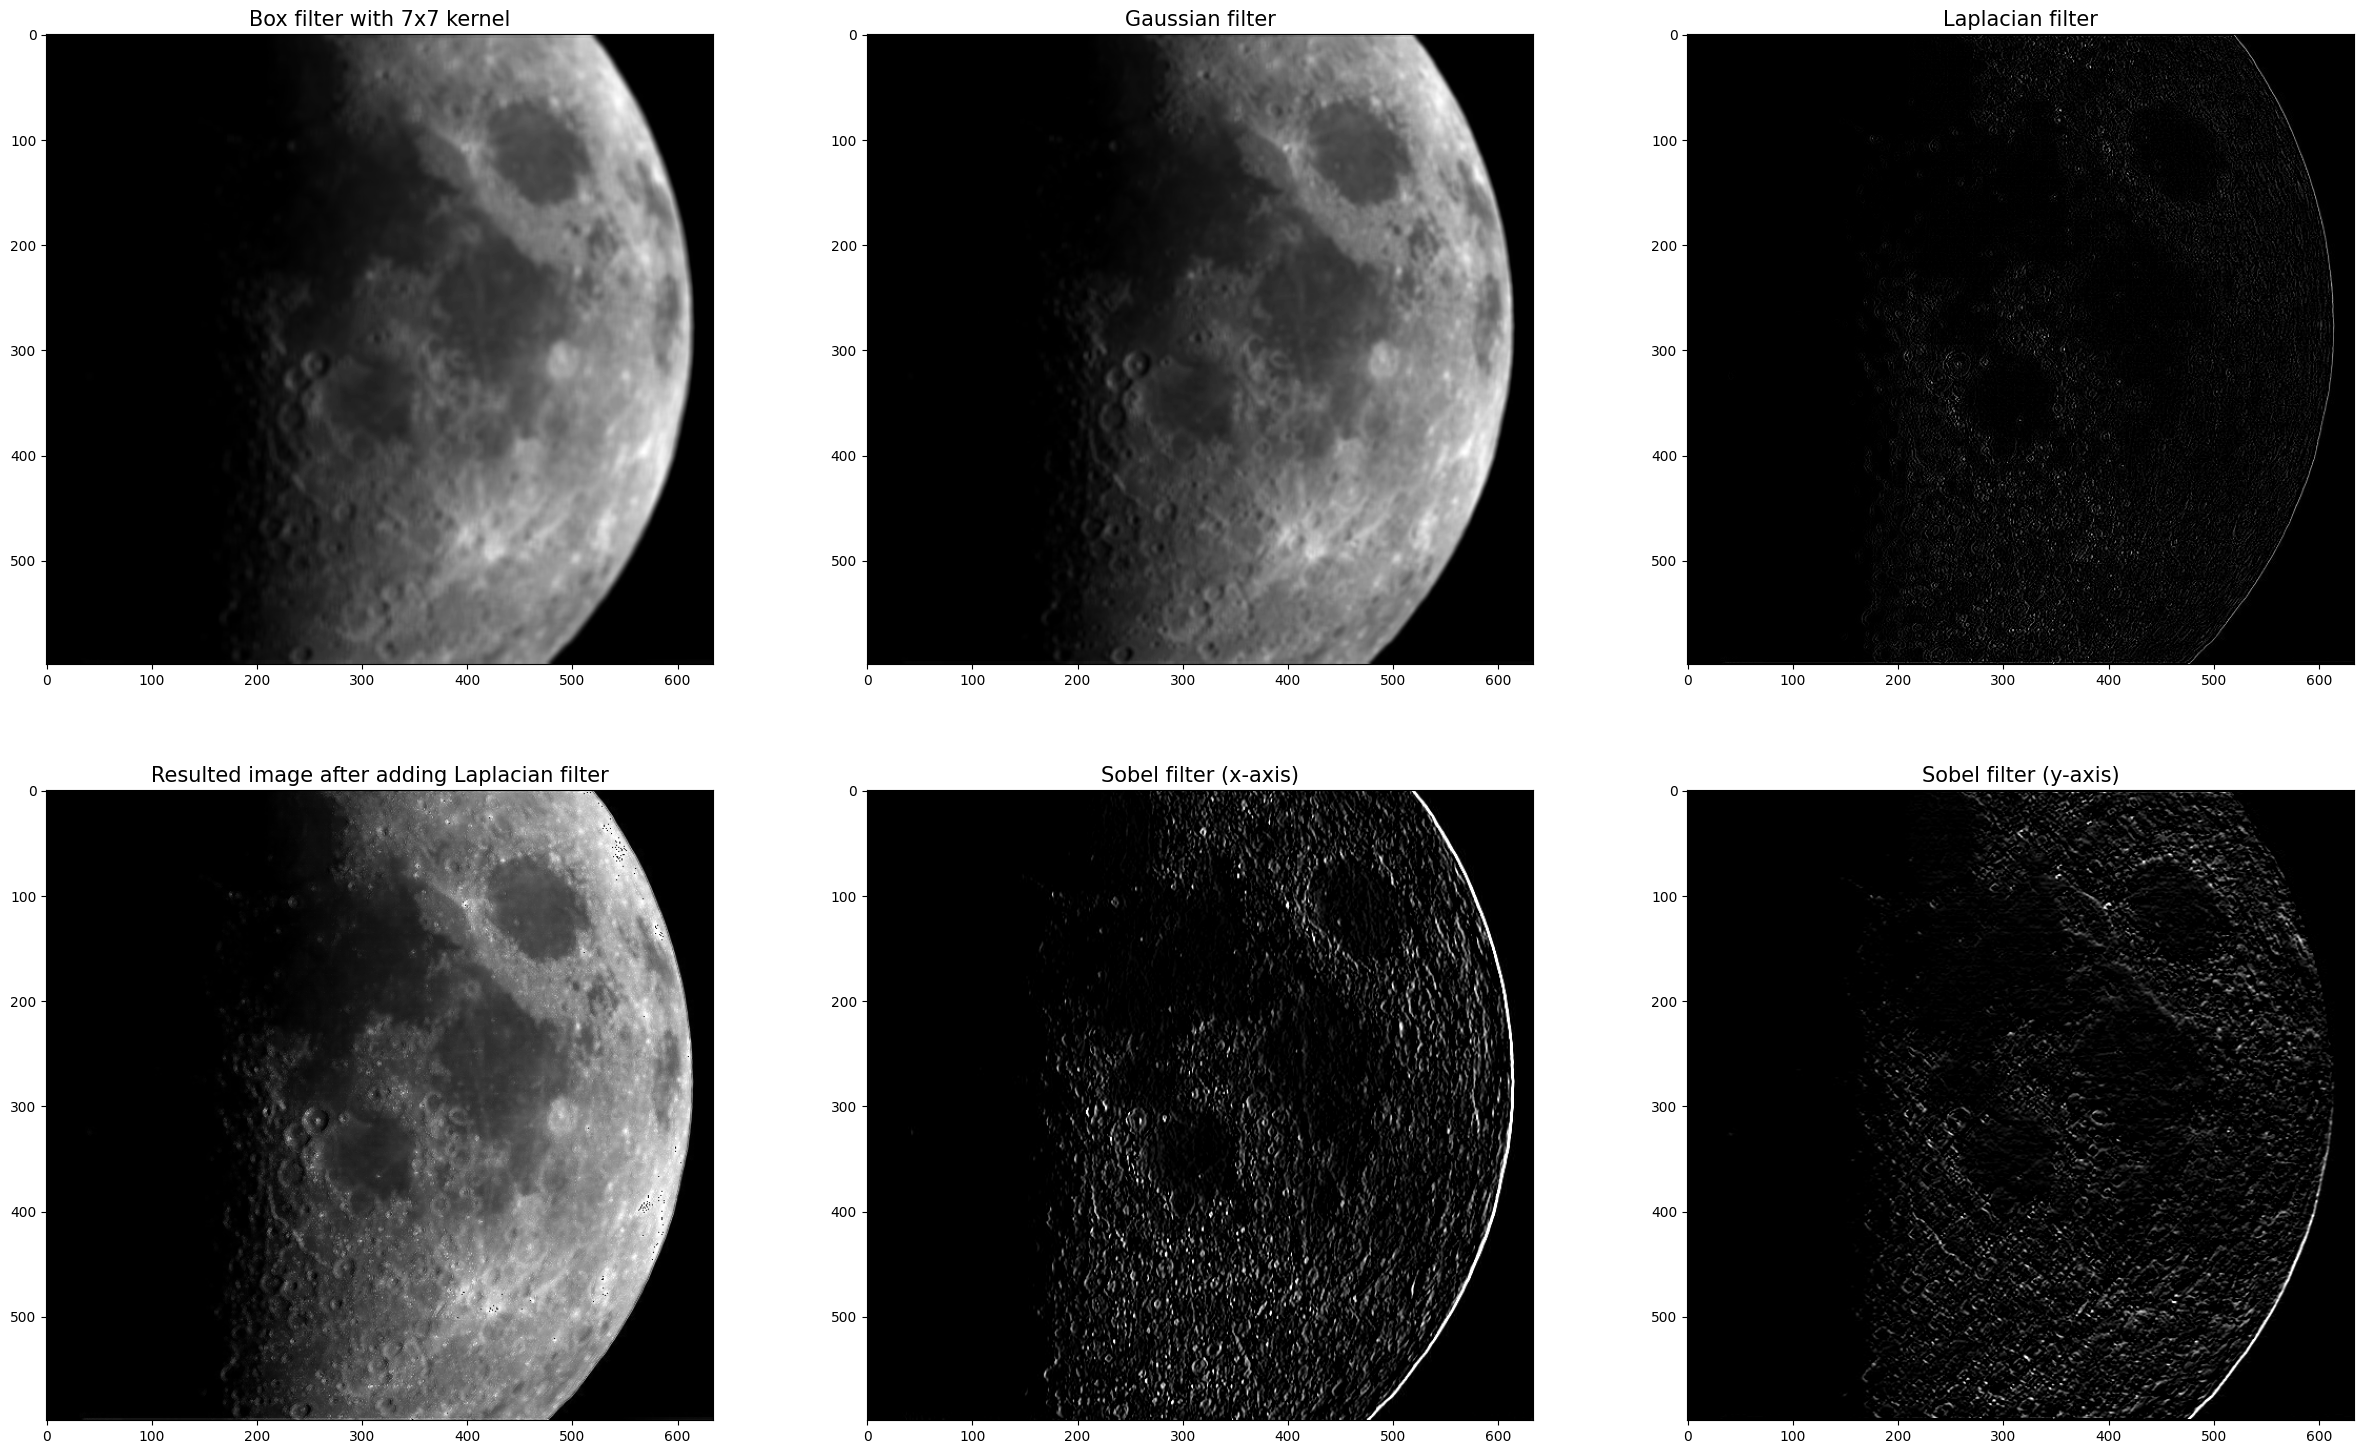

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(30,18))
ax[0,0].imshow(img1, cmap = 'gray')
ax[0,0].set_title('Box filter with 7x7 kernel', fontsize = 15)
ax[0,1].imshow(img2, cmap = 'gray')
ax[0,1].set_title('Gaussian filter', fontsize = 15)
ax[0,2].imshow(img3_1, cmap = 'gray')
ax[0,2].set_title('Laplacian filter', fontsize = 15)
ax[1,0].imshow(img3_2, cmap = 'gray')
ax[1,0].set_title('Resulted image after adding Laplacian filter', fontsize = 15)
ax[1,1].imshow(img4_1, cmap = 'gray')
ax[1,1].set_title('Sobel filter (x-axis)', fontsize = 15)
ax[1,2].imshow(img4_2, cmap = 'gray')
ax[1,2].set_title('Sobel filter (y-axis)', fontsize = 15)
plt.show()



* In Box filter, the image gets blurred
* In Gaussian, the image gets blurred in a uniform way.
* Then after applying Laplacian filter, the edges get enhanced since, laplacian filter is being used for edge detection.
* Sobel filter is also used for edge detection along x-axis and y-axis of an image.



## 3) Generate a filled white rectangle at the center of a 100 × 100 pixel image, with rest of the pixels being black and display its Fourier transform. Write a code that is flexible enough to generate any size of rectangle so that you can observe the different effects.

In [ ]:
# Rectangle generation
def white_rect(size):
  img = np.zeros((100,100), dtype = np.uint8)
  M,N = img.shape
  c_row = M//2
  c_col = N//2
  rec_m, rec_n = size
  img[(c_row - (rec_m//2)): (c_row + (rec_m//2)),
      (c_col - (rec_n//2)): (c_col + (rec_n//2))] = 255

  return img

In [ ]:
img = white_rect((20,30))
f = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(f)

### a) Display the magnitude spectrum, the phase spectrum and the power spectrum of the above image so that the avarage of the pixel values is visible at the center.

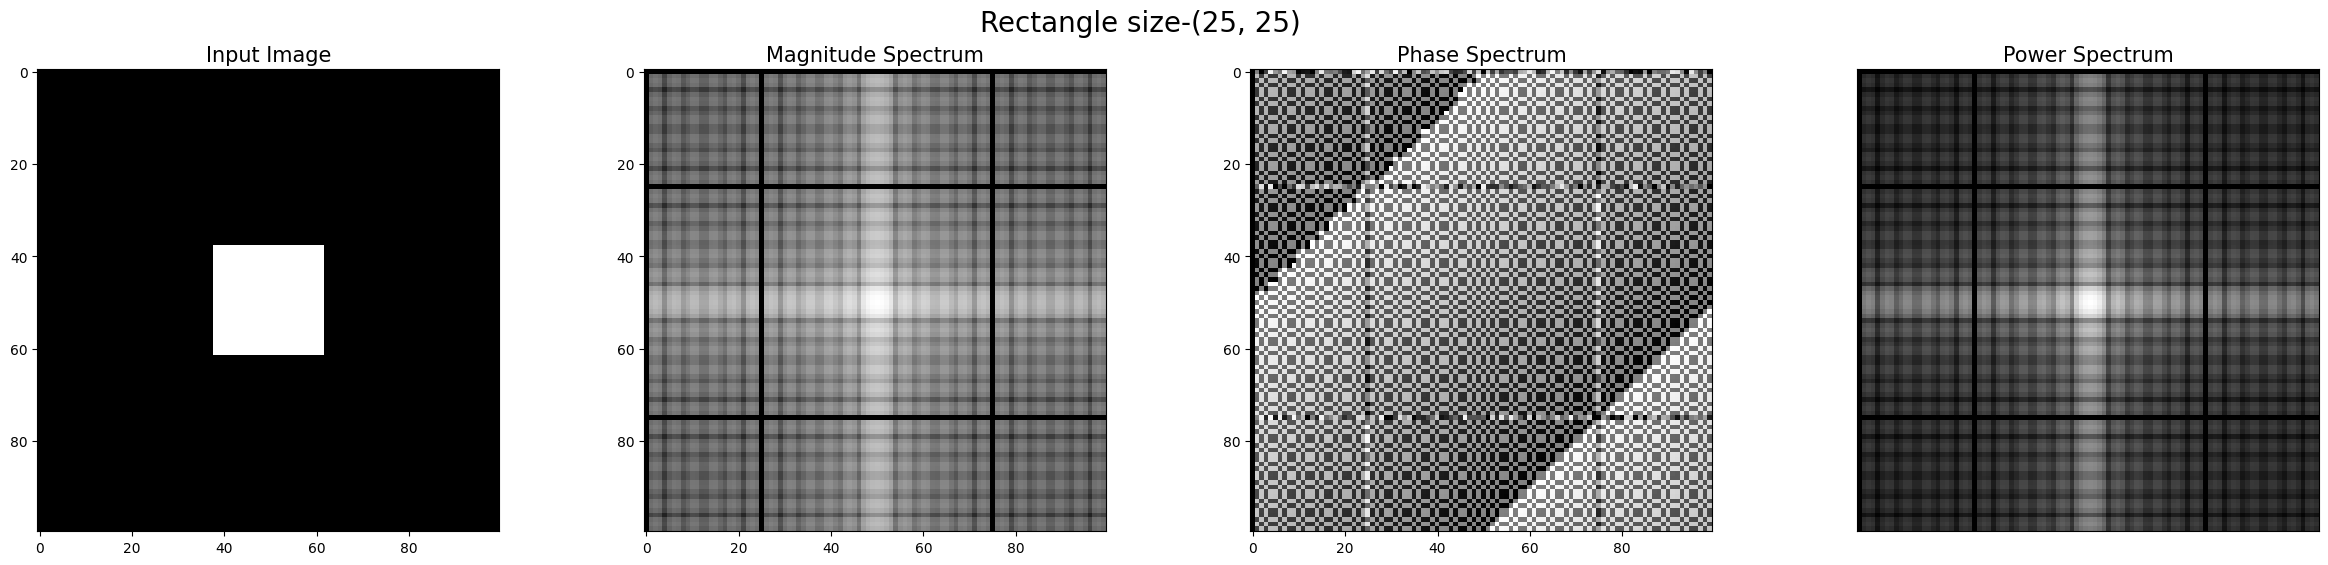

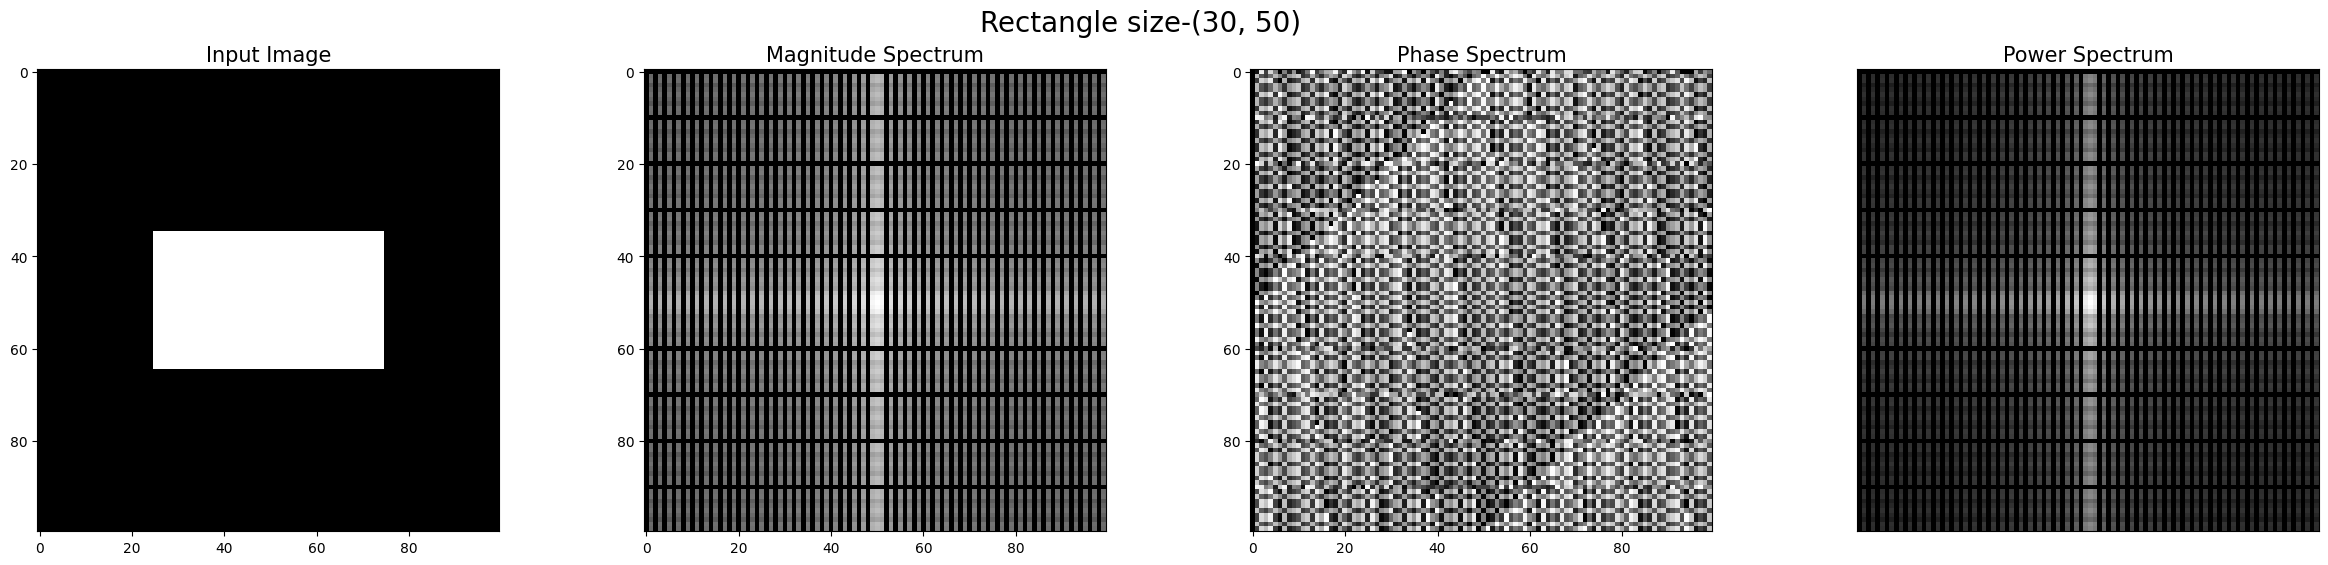

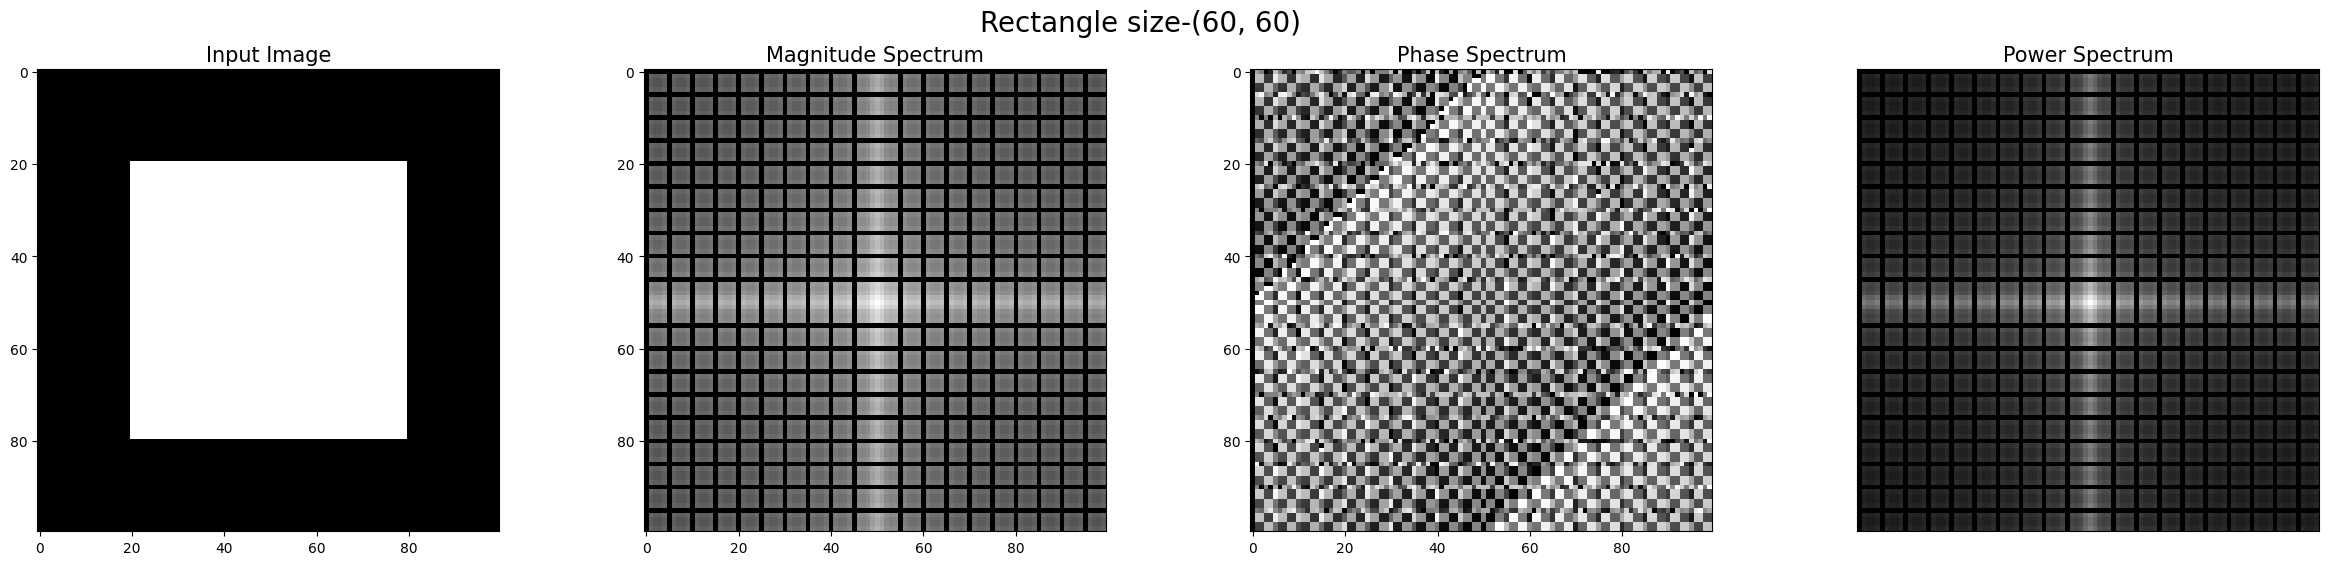

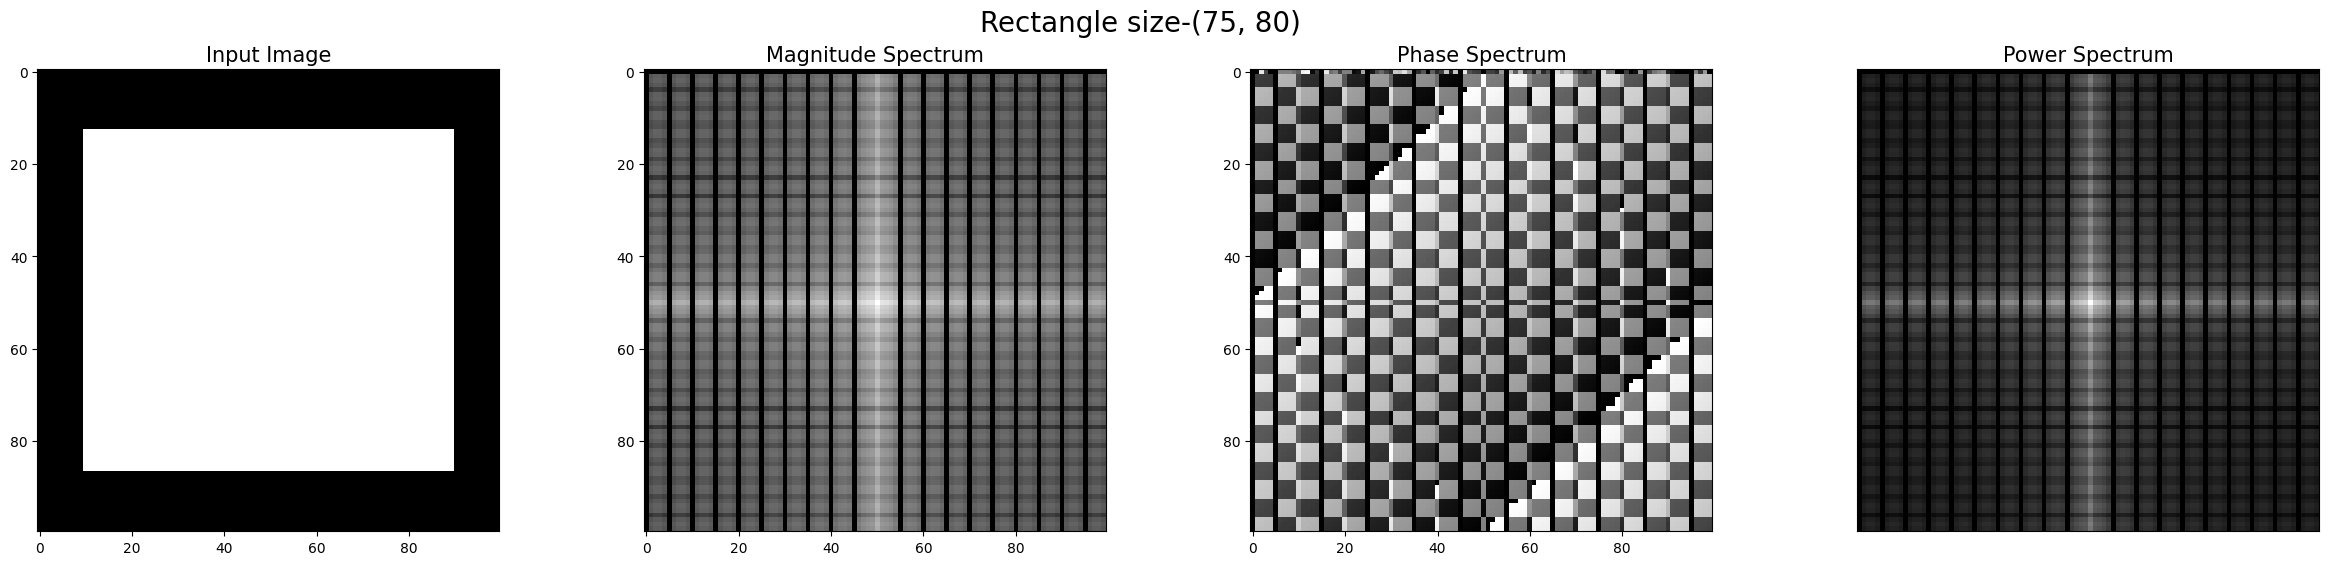

In [ ]:
def show_sprectums(size):
  img = white_rect(size)
  f = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  fshift = np.fft.fftshift(f)
  tmp, phase_spectrum = cv2.cartToPolar(fshift[:,:,0], fshift[:,:,1])
  magnitude_spectrum = 20*np.log(1+np.abs(tmp))
  power_spectrum = np.power(magnitude_spectrum, 2)
  fig, ax = plt.subplots(1,4,figsize=(30,6))
  ax[0].imshow(img, cmap = 'gray')
  ax[0].set_title('Input Image', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[1].imshow(magnitude_spectrum, cmap = 'gray')
  ax[1].set_title('Magnitude Spectrum', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[2].imshow(phase_spectrum, cmap = 'gray')
  ax[2].set_title('Phase Spectrum', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[3].imshow(power_spectrum, cmap = 'gray')
  ax[3].set_title('Power Spectrum', fontsize = 15), plt.xticks([]), plt.yticks([])
  plt.suptitle(f'Rectangle size-{size}',fontsize = 20)
  plt.show()
l_size = [(25,25),(30,50),(60,60),(75,80)]
for i in l_size:
  show_sprectums(i)

### b) How does increasing/decreasing the size of the white rectangle affect the above spectral images? Provide an explanation for these changes (or lack of changes).

* If we increase the size of the rectangle, the magnitude of the low-frequency components in the spectral images will increase, while the magnitude of the high-frequency components will decrease. This is because a larger rectangle contains more low-frequency components and fewer high-frequency components.

* On the other hand, if we decrease the size of the rectangle, the magnitude of the high-frequency components in the spectral images will increase, while the magnitude of the low-frequency components will decrease. This is because a smaller rectangle contains more high-frequency components and fewer low-frequency components.

Hence the size of the white rectangle in the image affects the distribution of frequency components in the spectral images. A larger rectangle has more low-frequency components and a smaller rectangle has more high-frequency components.

## 4) Comparison of low pass filters: use the image “ricegrains.jpg”.


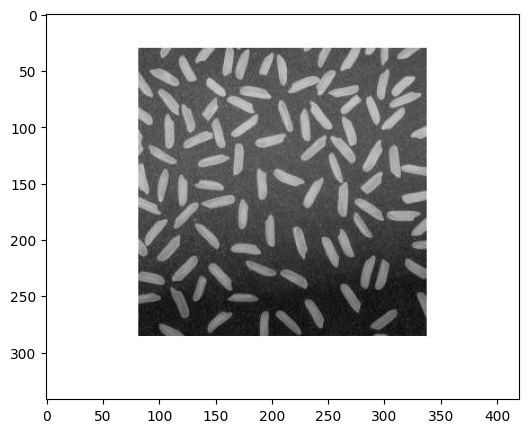

In [ ]:
img = cv2.imread('Filtering/ricegrains.jpg', 0)
plt.imshow(img, cmap = 'gray')

### a) Spatial domain filtering - Apply a box filter, a Gaussian filter and a median filter to smooth the image. Change the kernel size from 3x3 to 5x5 and 7x7 and observe the result. Use a fixed σ = 1.5.


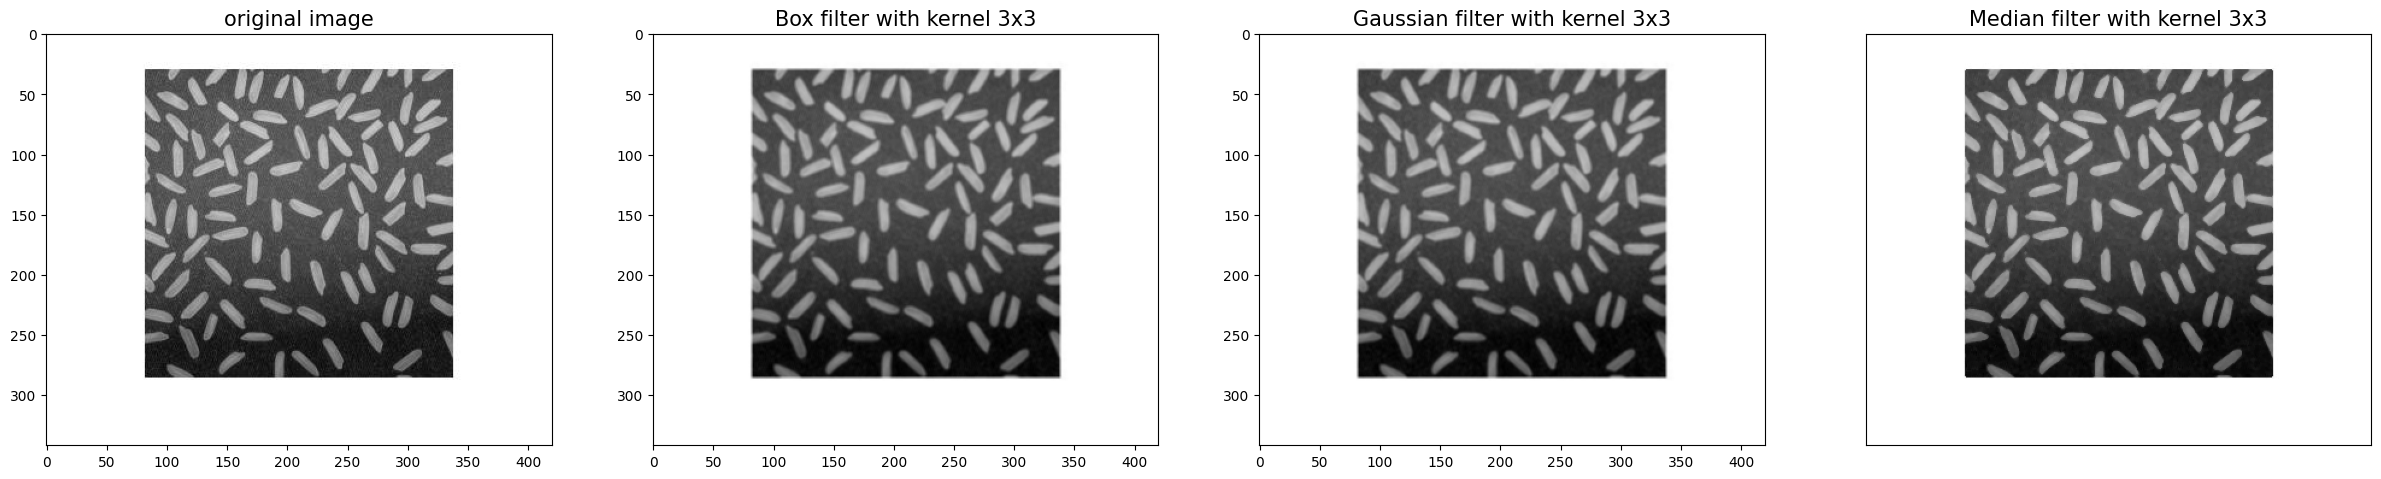

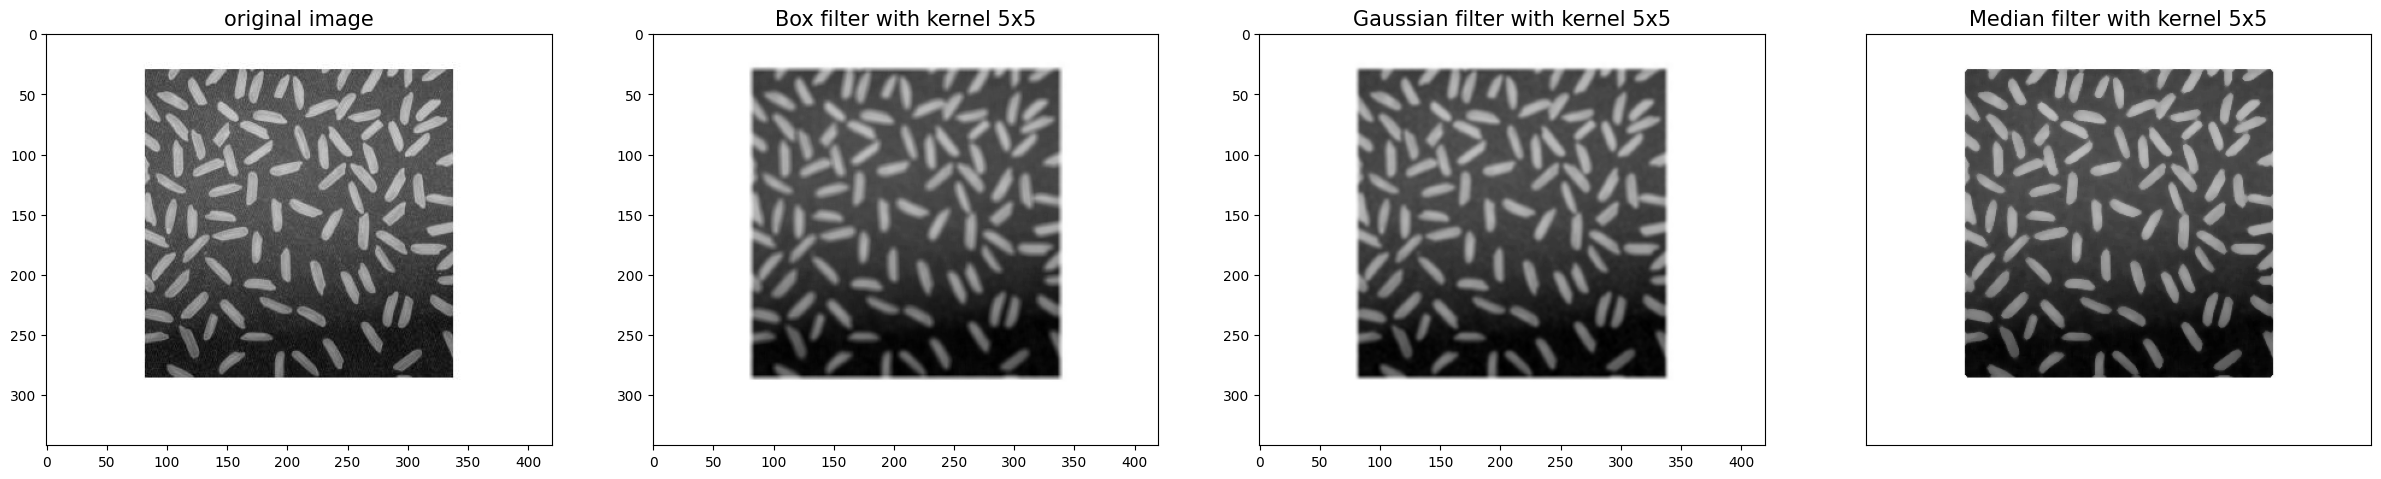

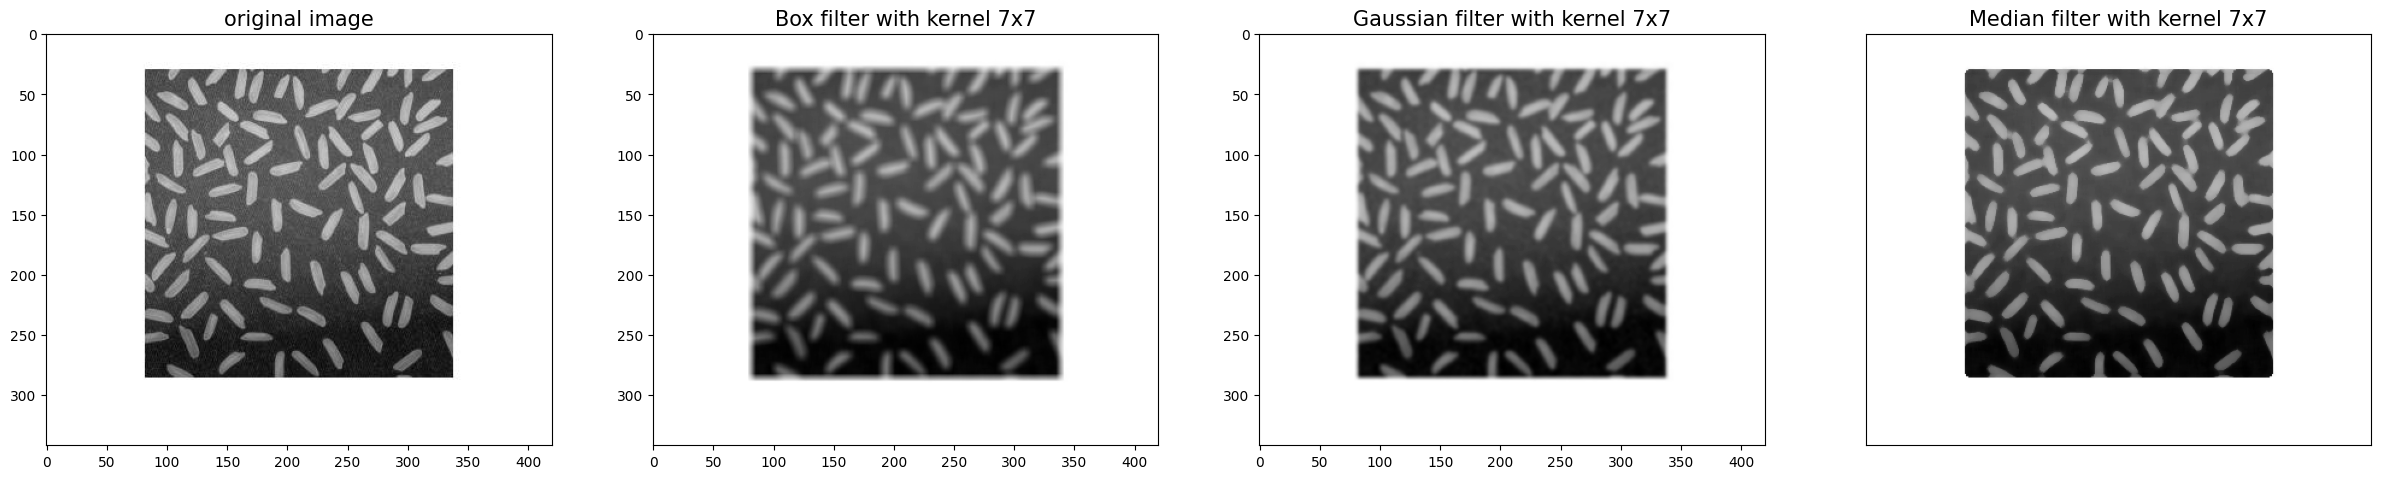

In [ ]:
kernel_sizes = [3,5,7]

for i in kernel_sizes:
  box = cv2.blur(img , (i,i))
  gauss = cv2.GaussianBlur(img, (i,i), 1.5)
  median = cv2.medianBlur(img, i)
  fig, ax = plt.subplots(1,4,figsize=(30,18))
  ax[0].imshow(img, cmap = 'gray')
  ax[0].set_title('original image', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[1].imshow(box, cmap = 'gray')
  ax[1].set_title(f'Box filter with kernel {i}x{i}', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[2].imshow(gauss, cmap = 'gray')
  ax[2].set_title(f'Gaussian filter with kernel {i}x{i}', fontsize = 15), plt.xticks([]), plt.yticks([])
  ax[3].imshow(median, cmap = 'gray')
  ax[3].set_title(f'Median filter with kernel {i}x{i}', fontsize = 15), plt.xticks([]), plt.yticks([])
  plt.show()

### b) Frequency domain filtering - Design a lowpass frequency filter (try both Butterworth and Gaussian) to smooth the image (choose appropriate radius).

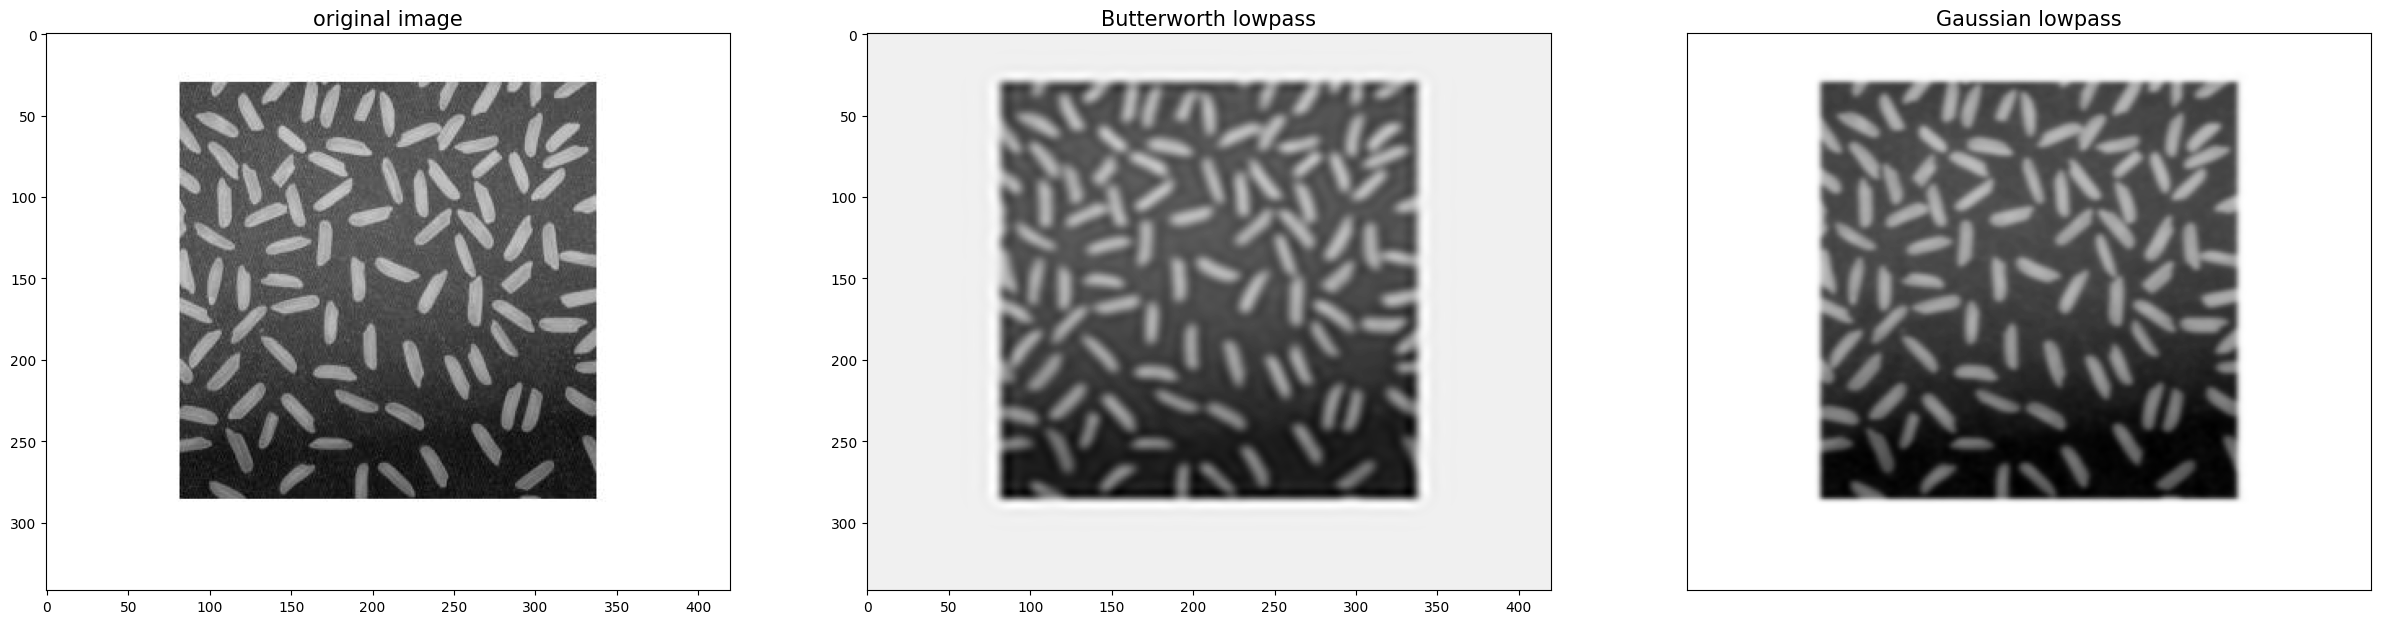

In [ ]:
def butterworth_lowpass(img, d_0, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = M//2
  cy = N//2
  H = np.zeros((M,N))

  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/d_0)**(2*n)))

  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

def gaussian_lowpass(img, d_0):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = M//2
  cy = N//2
  H = np.zeros((M,N))

  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(d_0**2))))

  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

butterworth_img = butterworth_lowpass(img, 40, 4)
gauss_img = gaussian_lowpass(img, 40)

fig, ax = plt.subplots(1,3,figsize=(30,18))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('original image', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[1].imshow(butterworth_img, cmap = 'gray')
ax[1].set_title('Butterworth lowpass', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[2].imshow(gauss_img, cmap = 'gray')
ax[2].set_title('Gaussian lowpass', fontsize = 15), plt.xticks([]), plt.yticks([])

plt.show()

## 5) Comparison of high pass filters: use the image “tigerbw.jpg”.

In [ ]:
img = cv2.imread('Filtering/tigerbw.jpg', 0)

### a) Spatial domain filtering: Apply unsharp masking, Sobel edge detector, and Laplace edge detection in the spatial domain to highlight the edges in the image.


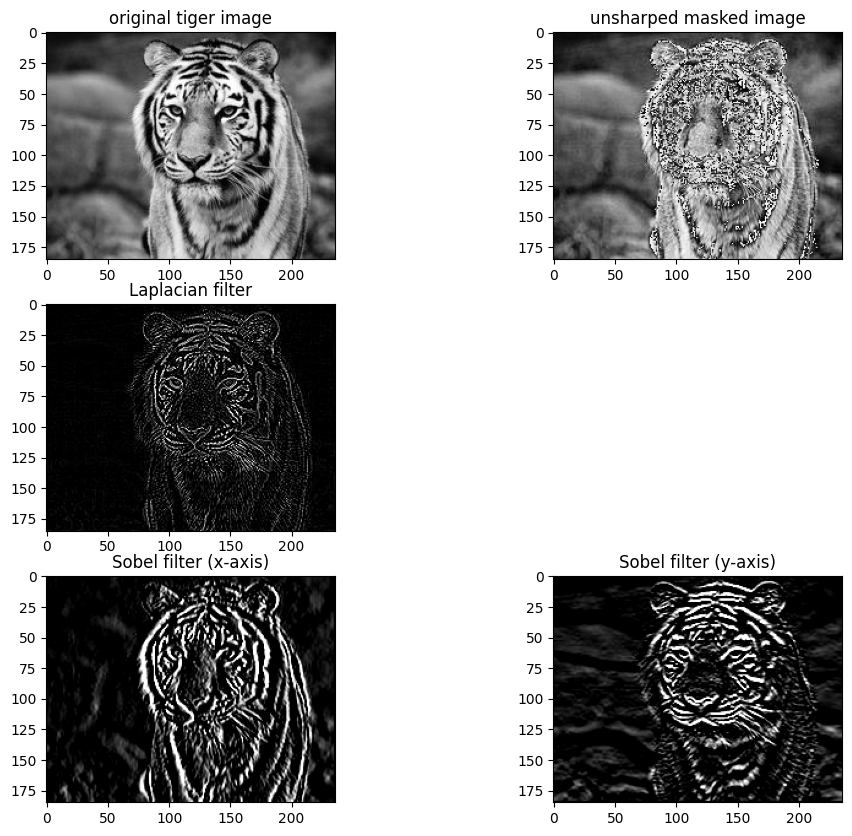

In [ ]:
# unsharp masking
k = cv2.getGaussianKernel(5, 10)
gauss = k*k.T
blurred_img = cv2.filter2D(img, -1, gauss)
mask = img - blurred_img
unsharped_img = img + mask

# Sobel Edge Detector
sob_x = cv2.filter2D(img, -1, sobel_x)
sob_y = cv2.filter2D(img, -1, sobel_y)

# Laplace Edge Detector
lap_img = cv2.filter2D(img, -1, lap)

fig, ax = plt.subplots(3,2,figsize=(12,10))
fig.delaxes(ax[1,1])
ax[0,0].imshow(img, cmap = 'gray')
ax[0,0].set_title('original tiger image', fontsize = 12)
ax[0,1].imshow(unsharped_img, cmap = 'gray')
ax[0,1].set_title('unsharped masked image', fontsize = 12)
ax[1,0].imshow(lap_img, cmap = 'gray')
ax[1,0].set_title('Laplacian filter', fontsize = 12)
ax[2,0].imshow(sob_x, cmap = 'gray')
ax[2,0].set_title('Sobel filter (x-axis)', fontsize = 12)
ax[2,1].imshow(sob_y, cmap = 'gray')
ax[2,1].set_title('Sobel filter (y-axis)', fontsize = 12)
plt.show()

### b) Frequency domain filtering: Design a highpass frequency (use both Butterworth and Gaussian) filter in the frequency domain to highlight the edges in the image.

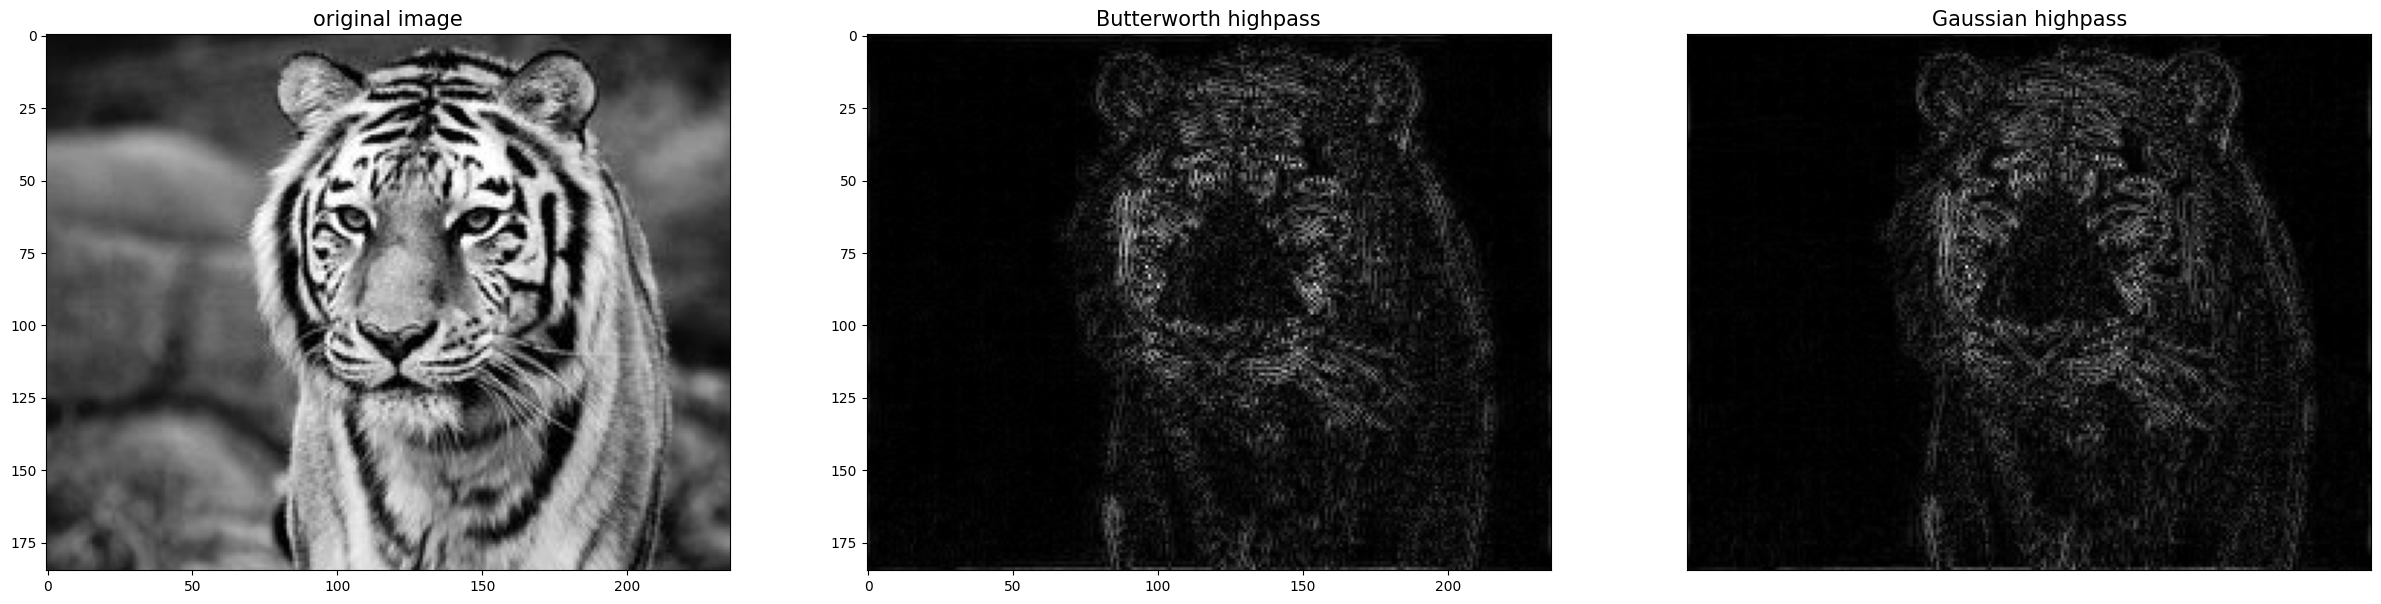

In [ ]:
def butterworth_highpass(img, d_0, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = M//2
  cy = N//2
  H = np.zeros((M,N))

  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/d_0)**(2*n)))

  H = 1 - H
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

def gaussian_highpass(img, d_0):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = M//2
  cy = N//2
  H = np.zeros((M,N))

  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(d_0**2))))

  H = 1 - H
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

butterworth_img = butterworth_highpass(img, 40, 4)
gauss_img = gaussian_highpass(img, 40)

fig, ax = plt.subplots(1,3,figsize=(30,18))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('original image', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[1].imshow(butterworth_img, cmap = 'gray')
ax[1].set_title('Butterworth highpass', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[2].imshow(gauss_img, cmap = 'gray')
ax[2].set_title('Gaussian highpass', fontsize = 15), plt.xticks([]), plt.yticks([])

plt.show()

## 6) Convolution in the spatial and the frequency domain: There are two ways to implement spatial filters - one is to apply convolution, the other is through multiplication in the frequency domain. Use “cameraman.jpg” as the testing image.


In [ ]:
img = cv2.imread('Filtering/cameraman.jpg',0)

### a) Apply a 11 × 11 average filter in the spatial domain.

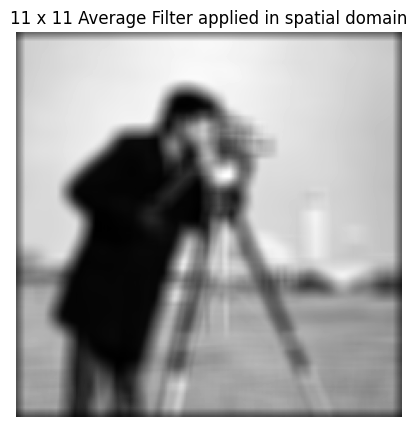

In [ ]:
box = ((1/(11*11))*np.ones((11,11))).astype(np.float32)

start_time = time.time()
filter_spatial = convolve2d(img, box, 'same')
end_time = time.time()
time_1 = end_time-start_time

plt.imshow(filter_spatial, cmap = 'gray')
plt.title("11 x 11 Average Filter applied in spatial domain")
plt.axis('off')
plt.show()

### b) Perform this enhancement in the frequency domain. Follow these steps:

* pad both the original image and the kernel
* transform both the padded original original image and the kernel
* perform multiplication
* perform inverse transform
* cut and display the useful content of the transformed image

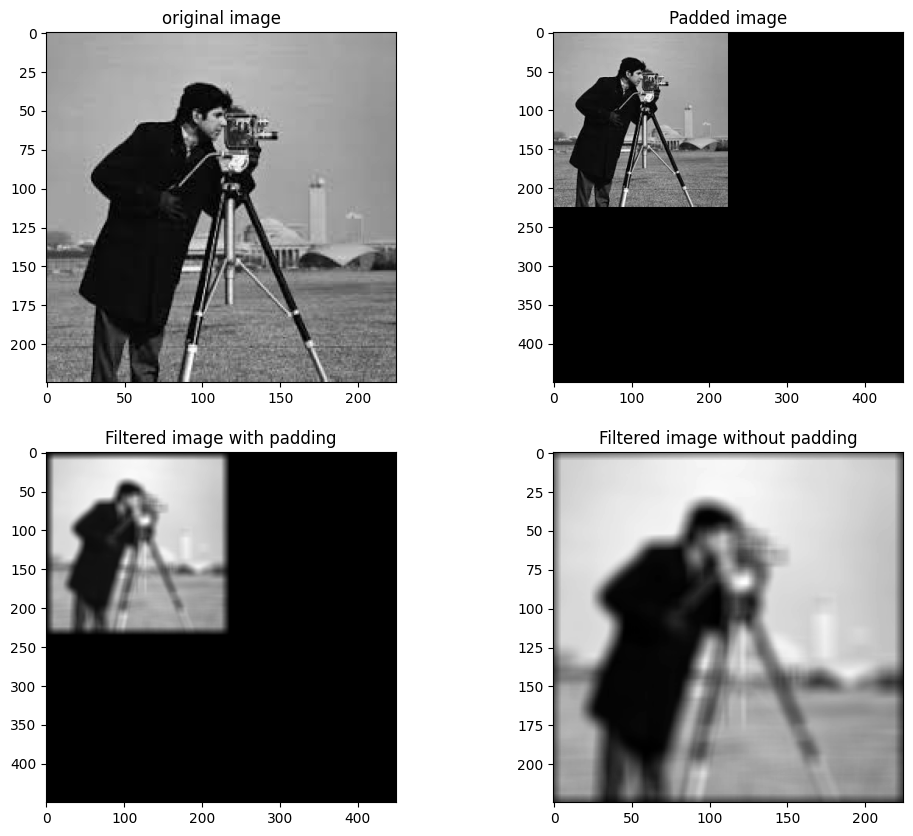

In [ ]:
def img_padding(img, shape):
  m,n = img.shape
  M, N = shape
  padded_img = np.zeros((M, N))
  padded_img[:m,:n] = img
  return padded_img

M, N = img.shape
P = 2*M
Q = 2*N

# Padding image and the kernel
padded_img = img_padding(img, (P,Q))
padded_filter = img_padding(box, (P,Q))

# Fourier transform of image and kernel
image_fft =  np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(padded_filter))

start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()
time_2 = end_time-start_time

transformed_spatial = np.abs(np.fft.ifft2(conv_fourier)).astype(np.uint8)
transformed_spatial_cut = transformed_spatial[5:5+M,5:5+N]

fig, ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,0].set_title('original image', fontsize = 12)
ax[0,1].imshow(padded_img, cmap = 'gray')
ax[0,1].set_title('Padded image', fontsize = 12)
ax[1,0].imshow(transformed_spatial, cmap = 'gray')
ax[1,0].set_title('Filtered image with padding', fontsize = 12)
ax[1,1].imshow(transformed_spatial_cut, cmap = 'gray')
ax[1,1].set_title('Filtered image without padding', fontsize = 12)
plt.show()

### c) Compare the time required for parts (a) and (b).

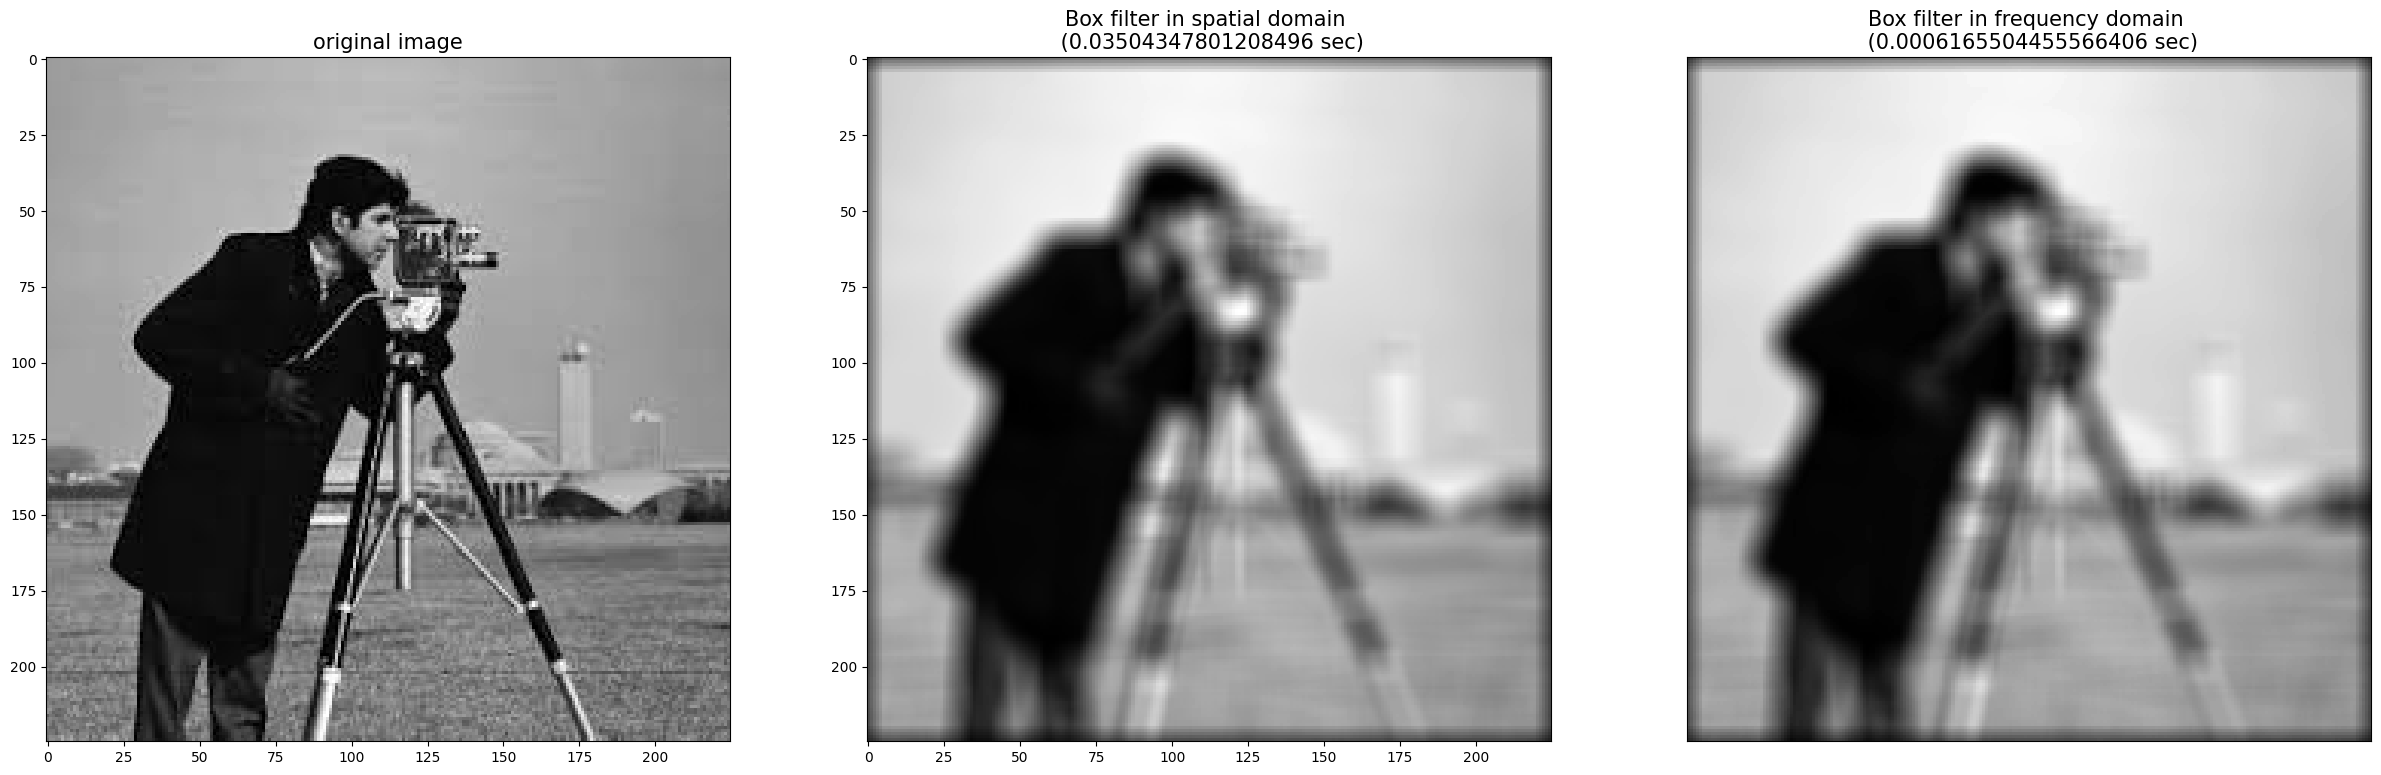

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(30,18))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('original image', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[1].imshow(filter_spatial, cmap = 'gray')
ax[1].set_title(f'Box filter in spatial domain \n ({time_1} sec)', fontsize = 15), plt.xticks([]), plt.yticks([])
ax[2].imshow(transformed_spatial_cut, cmap = 'gray')
ax[2].set_title(f'Box filter in frequency domain \n ({time_2} sec)', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.show()

Thus we can say that frequency domain operation is much faster than the convolution in the spatial domain.